Name: Mohammad
Last name: GHafourian
Student number: 99106493

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('Heart_Disease_Dataset.csv')
# Display the first few rows of the dataset
print(data.head())


   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


1)

In [3]:
print("Data Size:")
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Data Size:
Number of Rows: 1190
Number of Columns: 12


2)

In [4]:
missing_features = data.columns[data.isnull().any()]
if len(missing_features) == 0:
    print("No missing features in the dataset.")
else:
    print("Missing features:", missing_features)

No missing features in the dataset.


3)

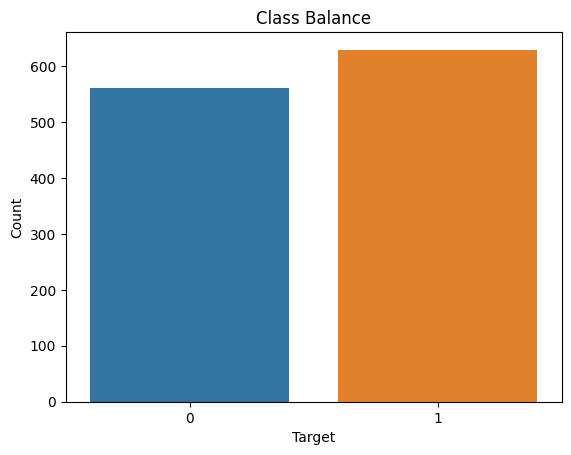

In [5]:
sns.countplot(x='target', data=data)
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Class Balance")
plt.show()


4)

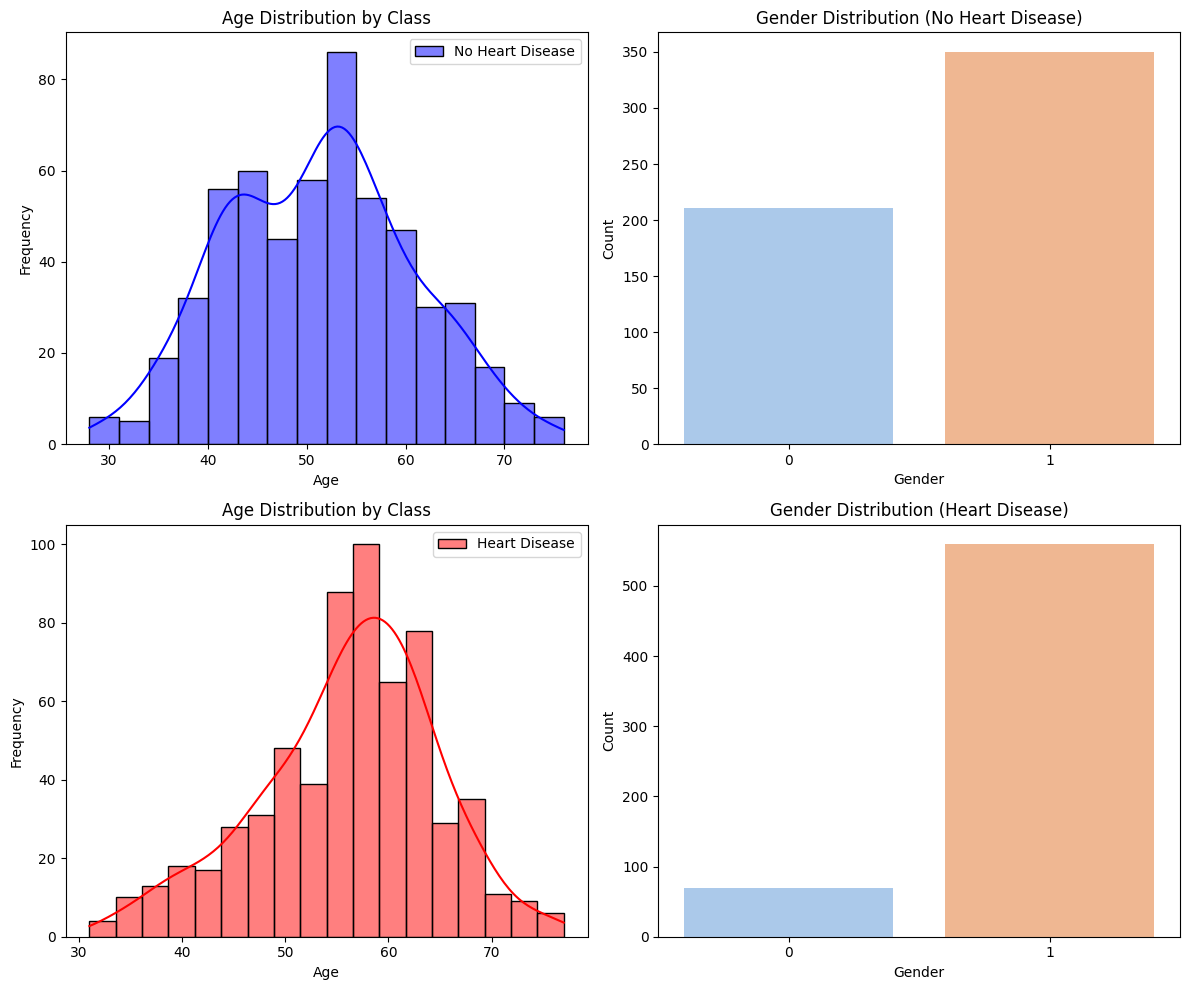

In [6]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.histplot(data[data['target'] == 0]['age'], kde=True, label='No Heart Disease', color='blue')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.title("Age Distribution by Class")

plt.subplot(2, 2, 2)
sns.countplot(x='sex', data=data[data['target'] == 0], palette='pastel')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution (No Heart Disease)")

plt.subplot(2, 2, 3)
sns.histplot(data[data['target'] == 1]['age'], kde=True, label='Heart Disease', color='red')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.title("Age Distribution by Class")

plt.subplot(2, 2, 4)
sns.countplot(x='sex', data=data[data['target'] == 1], palette='pastel')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution (Heart Disease)")

plt.tight_layout()
plt.show()

B)

In [15]:
# Calculate Z-scores for numeric features (age, resting bp s, cholestrol, max heart rate, oldpeak)
numeric_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Calculate Z-scores for each feature
z_scores = np.abs(stats.zscore(data[numeric_features]))
# Find the indices of outliers for each feature
outlier_indices = np.where(z_scores > 3)
print(outlier_indices)
# Create a list of unique outlier indices
unique_outlier_indices , A = (outlier_indices)
# Remove outliers from the dataset
data_no_outliers = data.drop(index=unique_outlier_indices)

# Report the indices of the removed outliers and the final size of the dataset
print("Indices of Removed Outliers:")
print(unique_outlier_indices)
print("\nFinal Size of the Dataset after Removing Outliers:")
print(data_no_outliers.shape)

(array([  30,   76,  109,  149,  167,  242,  325,  366,  371,  391,  400,
        450,  593,  618,  704,  734,  761,  773,  793,  852,  978, 1010,
       1013, 1039, 1070, 1075, 1078, 1172]), array([2, 2, 1, 2, 4, 1, 4, 1, 3, 3, 1, 1, 1, 2, 4, 1, 1, 4, 4, 4, 4, 4,
       1, 2, 4, 1, 4, 4]))
Indices of Removed Outliers:
[  30   76  109  149  167  242  325  366  371  391  400  450  593  618
  704  734  761  773  793  852  978 1010 1013 1039 1070 1075 1078 1172]

Final Size of the Dataset after Removing Outliers:
(1162, 12)


C)normlize

In [ ]:
# Define the desired upper bound 'y'
y_upper_bound = 1
scaler = MinMaxScaler(feature_range=(0, y_upper_bound))

# List of numeric features to normalize
numeric_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
# Normalize the numeric features
data_normalized = data.copy()
data_normalized[numeric_features] = scaler.fit_transform(data[numeric_features])

# Display the first few rows of the normalized dataset
print(data_normalized.head())

        age  sex  chest pain type  resting bp s  cholesterol  \
0  0.244898    1                2          0.70     0.479270   
1  0.428571    0                3          0.80     0.298507   
2  0.183673    1                2          0.65     0.469320   
3  0.408163    0                4          0.69     0.354892   
4  0.530612    1                3          0.75     0.323383   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                    0            0        0.788732                0   
1                    0            0        0.676056                0   
2                    0            1        0.267606                0   
3                    0            0        0.338028                1   
4                    0            0        0.436620                0   

    oldpeak  ST slope  target  
0  0.295455         1       0  
1  0.409091         2       1  
2  0.295455         1       0  
3  0.465909         2       1  
4  0.295455         1 

In [ ]:
# Separate the dataset into features (X) and the target (y)
X = data_normalized.drop('target', axis=1)
y = data_normalized['target']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a dictionary of kernels and their respective parameter grids
kernels = ['linear', 'rbf', 'poly']
kernel_parameters = {
    'linear': {},
    'rbf': {'C': [0.1, 1, 3, 10], 'gamma': [0.1, 1, 3, 10]},
    'poly': {'degree': [2, 3, 4, 5, 6]}
}
results = {}

for kernel in kernels:
    # Create the SVM classifier with the specified kernel
    svc = SVC(kernel=kernel)
    # Create a GridSearchCV object to find the best hyperparameters
    clf = GridSearchCV(svc, kernel_parameters[kernel], cv=5, scoring='accuracy')
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Get the best model with the optimal hyperparameters
    best_model = clf.best_estimator_
    # Make predictions on the test data
    y_pred = best_model.predict(X_test)
    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Store the results for this kernel
    results[kernel] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Print the results
    print(f"Results for {kernel} kernel:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Best Hyperparameters:", clf.best_params_)
    print()

# For the RBF kernel, check if the minimum accuracy is below 85%
if results['rbf']['Accuracy'] < 0.85:
    print("Accuracy for RBF kernel is below 85%. You may need to adjust gamma parameter.")

Results for linear kernel:
Accuracy: 0.8655
Precision: 0.8818
Recall: 0.8818
F1 Score: 0.8818
Best Hyperparameters: {}

Results for rbf kernel:
Accuracy: 0.8711
Precision: 0.8867
Recall: 0.8867
F1 Score: 0.8867
Best Hyperparameters: {'C': 10, 'gamma': 1}

Results for poly kernel:
Accuracy: 0.8627
Precision: 0.9096
Recall: 0.8424
F1 Score: 0.8747
Best Hyperparameters: {'degree': 6}

